# FRUIT QUALITY ANALYSIS - ENVIRONMENTAL FACTORS IMPACT STUDY

---

**Author:** Senior Data Scientist - Agricultural Analytics  
**Date:** November 4, 2025

## Purpose:
This analysis performs comprehensive study of fruit quality data to identify which environmental factors (Temperature, Humidity, Light, CO2) most influence the quality classification (Good/Bad) for four fruit types:
- Orange
- Pineapple
- Banana
- Tomato

## Dataset Structure:
- **Fruit**: Type of fruit (categorical)
- **Temp**: Temperature (°C)
- **Humid (%)**: Humidity percentage
- **Light (Fux)**: Light intensity
- **CO2 (pmm)**: CO2 concentration
- **Class**: Quality label (Good/Bad)

## SECTION 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.stats as stats

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("FRUIT QUALITY ANALYSIS - ENVIRONMENTAL FACTORS IMPACT STUDY")
print("="*80)
print()

FRUIT QUALITY ANALYSIS - ENVIRONMENTAL FACTORS IMPACT STUDY



## SECTION 2: Data Loading and Cleaning

In [2]:
print("STEP 1: Loading and Cleaning Dataset")
print("-" * 80)

# Load dataset
df = pd.read_csv('Dataset.csv')
print(f"Dataset loaded successfully!")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print()

STEP 1: Loading and Cleaning Dataset
--------------------------------------------------------------------------------
Dataset loaded successfully!
Total records: 10995
Total features: 6



In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())
print()

First 5 rows of the dataset:
       Fruit  Temp  Humid (%)  Light (Fux)  CO2 (pmm) Class
0     Orange    22         95     7.358649        361  Good
1     Orange    24         95    14.835898        370   Bad
2  Pineapple    25         95    10.104045        355   Bad
3     Banana    25         89    20.179643        388  Good
4     Tomato    23         90    12.621448        316  Good



In [4]:
# Check data types and missing values
print("Dataset Information:")
print(df.info())
print()

print("Missing values per column:")
print(df.isnull().sum())
print()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10995 entries, 0 to 10994
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fruit        10995 non-null  object 
 1   Temp         10995 non-null  int64  
 2   Humid (%)    10995 non-null  int64  
 3   Light (Fux)  10995 non-null  float64
 4   CO2 (pmm)    10995 non-null  int64  
 5   Class        10995 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 515.5+ KB
None

Missing values per column:
Fruit          0
Temp           0
Humid (%)      0
Light (Fux)    0
CO2 (pmm)      0
Class          0
dtype: int64

Fruit          0
Temp           0
Humid (%)      0
Light (Fux)    0
CO2 (pmm)      0
Class          0
dtype: int64



In [5]:
# Standardize inconsistent labels (BAD → Bad, GOOD → Good if exists)
print("Standardizing quality labels...")
df['Class'] = df['Class'].str.strip().str.capitalize()
print(f"Unique quality labels after standardization: {df['Class'].unique()}")
print()

# Check class distribution
print("Overall Class Distribution:")
print(df['Class'].value_counts())
print()

# Check fruit distribution
print("Fruit Type Distribution:")
print(df['Fruit'].value_counts())
print()

Standardizing quality labels...
Unique quality labels after standardization: ['Good' 'Bad']

Overall Class Distribution:
Class
Good    5667
Bad     5328
Name: count, dtype: int64

Fruit Type Distribution:
Fruit
Tomato       3741
Orange       3330
Pineapple    2257
Banana       1667
Name: count, dtype: int64



In [6]:
# Define environmental factors
environmental_factors = ['Temp', 'Humid (%)', 'Light (Fux)', 'CO2 (pmm)']
print(f"Environmental factors to analyze: {environmental_factors}")
print()

Environmental factors to analyze: ['Temp', 'Humid (%)', 'Light (Fux)', 'CO2 (pmm)']



## SECTION 3: Exploratory Data Analysis (EDA) - Overall Dataset

In [7]:
print("\n" + "="*80)
print("STEP 2: Exploratory Data Analysis (EDA) - Overall Dataset")
print("="*80)
print()

# Overall summary statistics
print("Summary Statistics for Environmental Factors:")
print(df[environmental_factors].describe())
print()


STEP 2: Exploratory Data Analysis (EDA) - Overall Dataset

Summary Statistics for Environmental Factors:
               Temp     Humid (%)   Light (Fux)     CO2 (pmm)
count  10995.000000  10995.000000  10995.000000  10995.000000
mean      23.839291     93.525603     24.932558    319.530241
std        1.234805      3.000812     48.023100     58.889350
min       21.000000     71.000000      4.221243     20.000000
25%       23.000000     94.000000      9.929455    289.000000
50%       24.000000     95.000000     12.908038    323.000000
75%       25.000000     95.000000     15.592255    359.000000
max       27.000000     95.000000    268.447808    478.000000



In [8]:
# Create visualization directory
import os
if not os.path.exists('analysis_results'):
    os.makedirs('analysis_results')
    print("Created 'analysis_results' directory for storing visualizations.")
print()

✓ Saved: Overall distribution plot


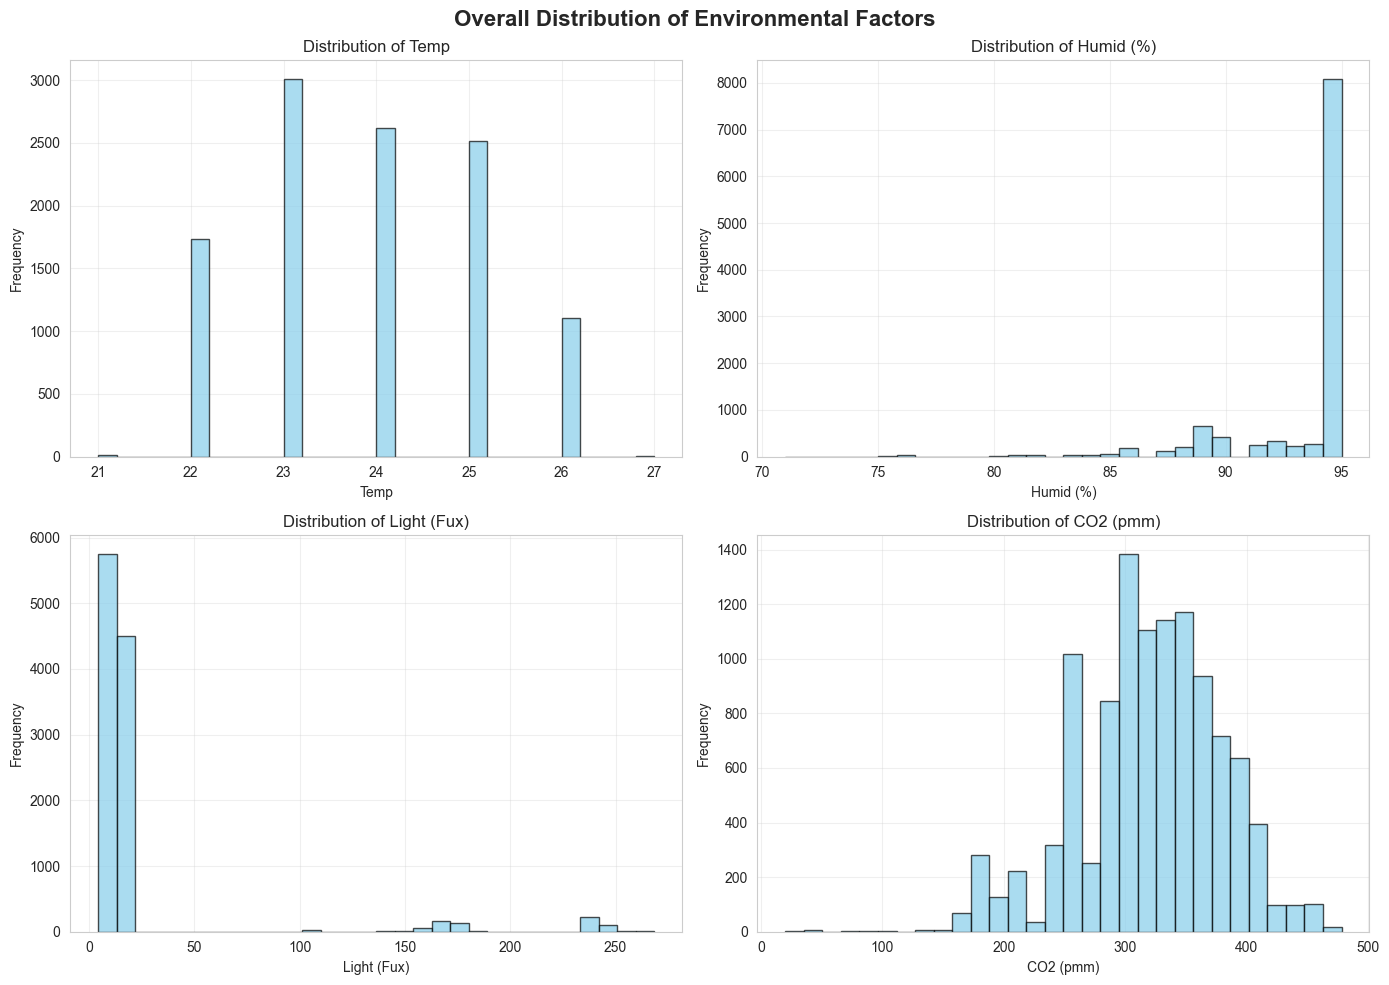

In [9]:
# Overall distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Overall Distribution of Environmental Factors', fontsize=16, fontweight='bold')

for idx, factor in enumerate(environmental_factors):
    ax = axes[idx // 2, idx % 2]
    ax.hist(df[factor], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel(factor)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {factor}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_results/00_overall_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Overall distribution plot")
plt.show()

## SECTION 4: Fruit-Specific Analysis

This section analyzes each fruit type individually to identify key environmental factors.

In [10]:
print("\n" + "="*80)
print("STEP 3: Fruit-Specific Analysis")
print("="*80)
print()

# Get unique fruits
fruits = df['Fruit'].unique()
print(f"Analyzing {len(fruits)} fruit types: {', '.join(fruits)}")
print()

# Dictionary to store results for each fruit
fruit_insights = {}


STEP 3: Fruit-Specific Analysis

Analyzing 4 fruit types: Orange, Pineapple, Banana, Tomato



### Main Analysis Loop

This cell performs comprehensive analysis for each fruit type including:
- Statistical analysis
- Correlation analysis
- Visualizations
- Machine learning models


ANALYZING: ORANGE
Total samples for Orange: 3330

Class Distribution:
Class
Good    1681
Bad     1649
Name: count, dtype: int64
Good: 1681 (50.5%)
Bad: 1649 (49.5%)


Summary Statistics for Orange by Quality Class:
--------------------------------------------------------------------------------

Good Quality Orange:
              Temp    Humid (%)  Light (Fux)    CO2 (pmm)
count  1681.000000  1681.000000  1681.000000  1681.000000
mean     22.327186    94.766805     6.983220   282.923260
std       0.489197     1.511186     1.623374    71.761697
min      21.000000    81.000000     4.221243   161.000000
25%      22.000000    95.000000     5.434776   226.000000
50%      22.000000    95.000000     7.000693   297.000000
75%      23.000000    95.000000     8.264638   347.000000
max      24.000000    95.000000    13.274420   398.000000

Bad Quality Orange:
              Temp    Humid (%)  Light (Fux)    CO2 (pmm)
count  1649.000000  1649.000000  1649.000000  1649.000000
mean     23.346270    

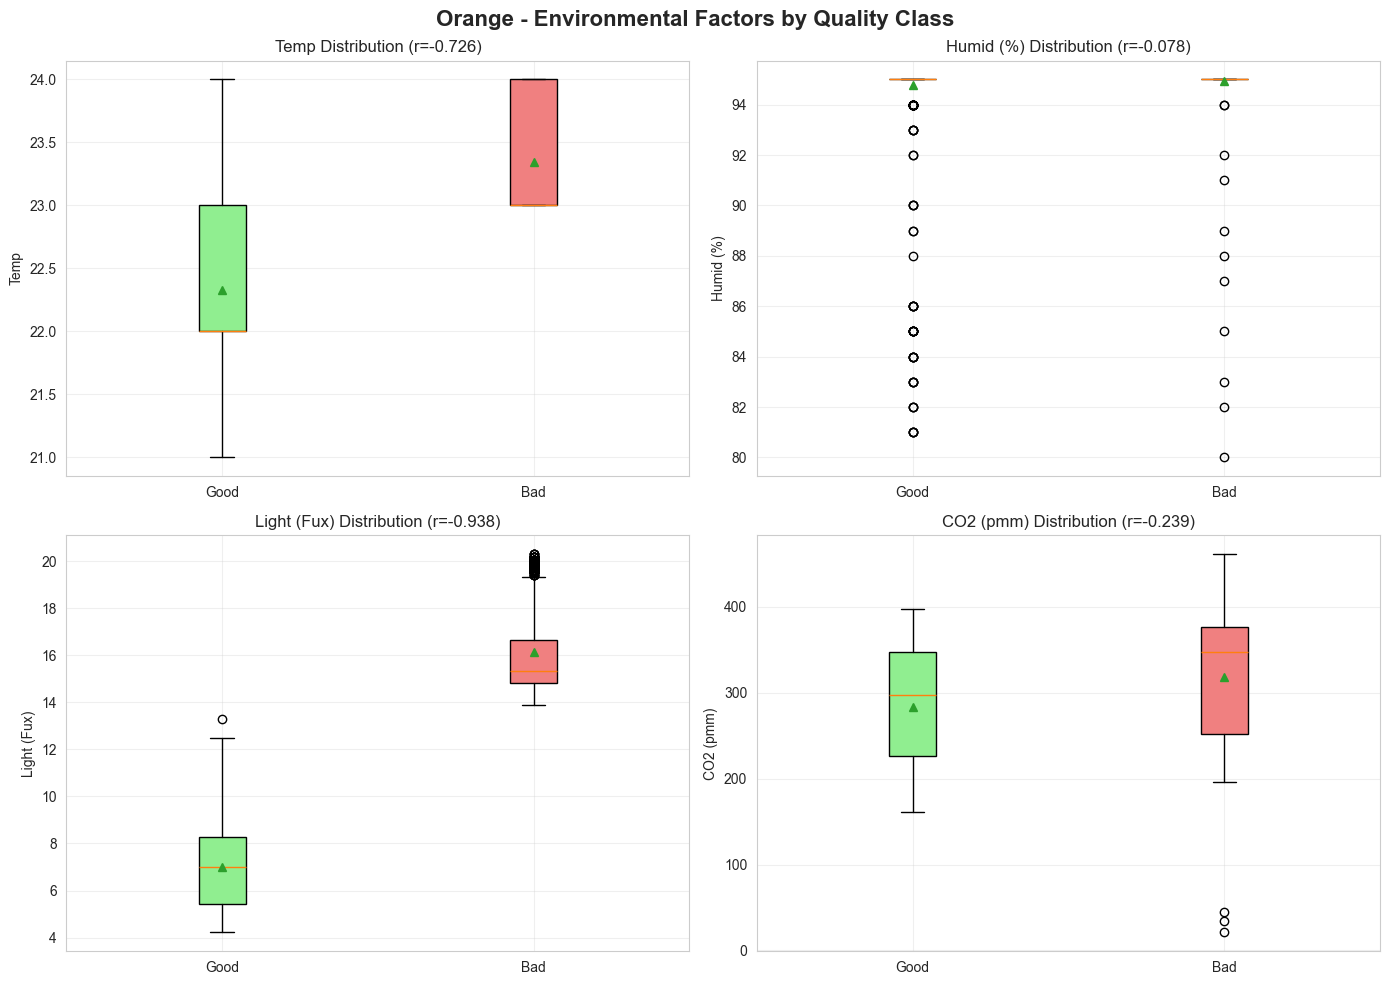

✓ Saved: Orange histogram comparison


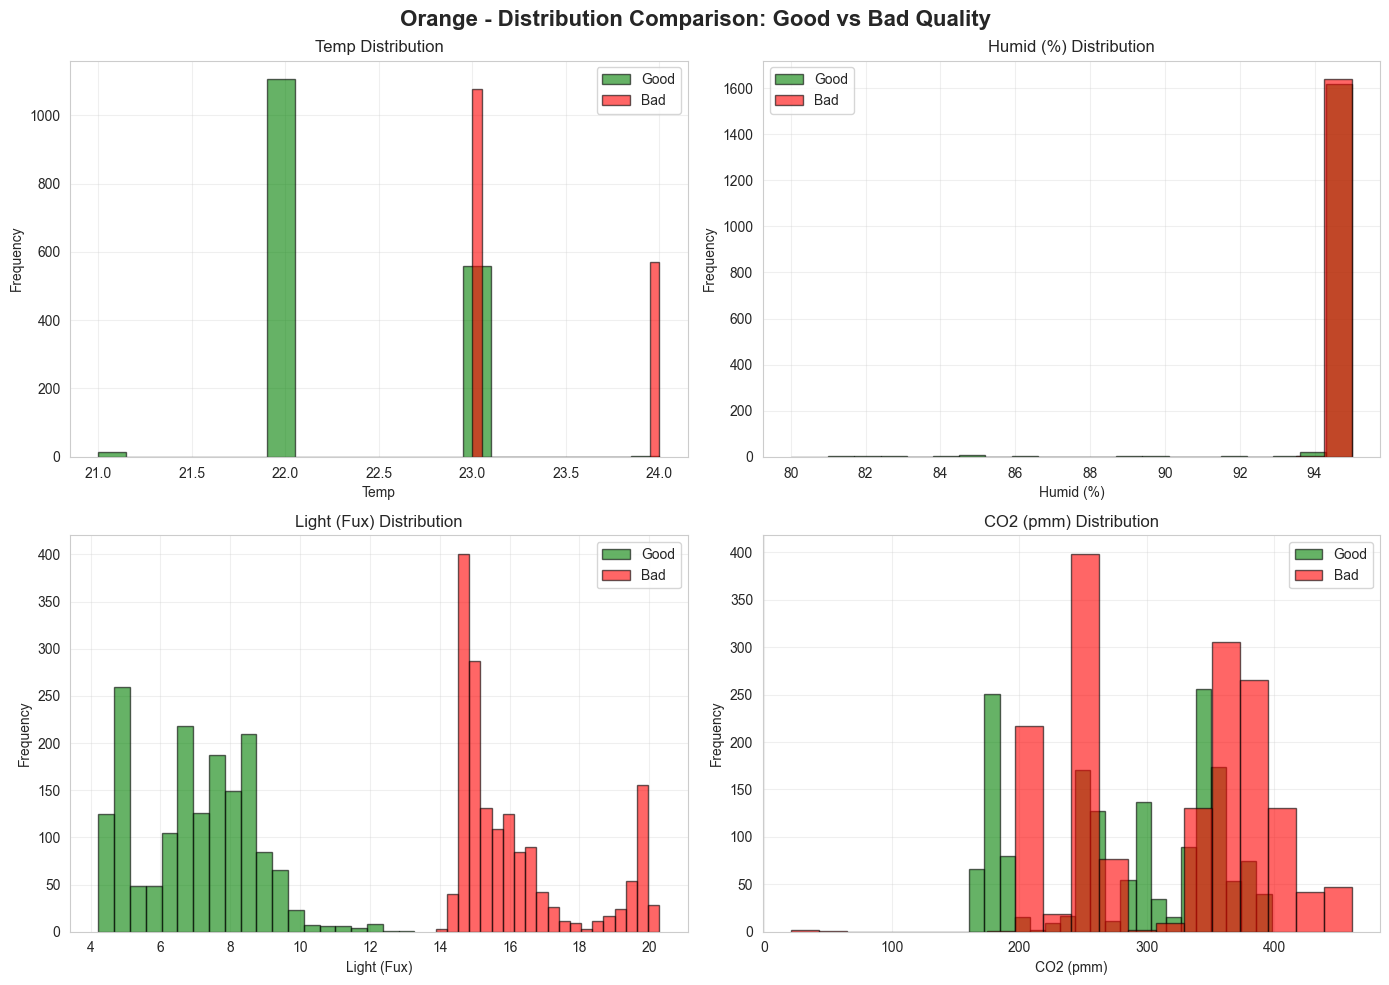

✓ Saved: Orange correlation heatmap


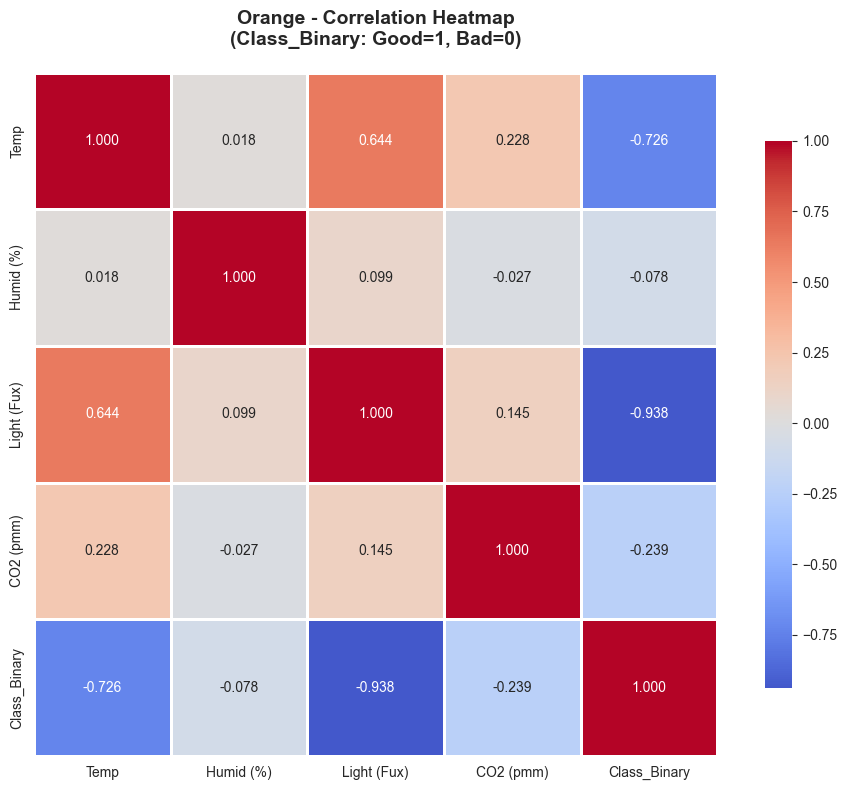


────────────────────────────────────────────────────────────────────────────────
Machine Learning Models for Orange
────────────────────────────────────────────────────────────────────────────────
Training set size: 2664 samples
Test set size: 666 samples

Model 1: Logistic Regression
----------------------------------------
Accuracy: 1.0000
AUC-ROC: 1.0000

Feature Importance (Logistic Regression Coefficients):
    Feature  Coefficient  Abs_Coefficient
Light (Fux)    -6.642274         6.642274
       Temp    -1.874603         1.874603
  CO2 (pmm)    -0.090999         0.090999
  Humid (%)     0.059215         0.059215

Model 2: Decision Tree Classifier
----------------------------------------
Accuracy: 1.0000
AUC-ROC: 1.0000

Feature Importance (Decision Tree - Gini Importance):
    Feature  Importance
Light (Fux)         1.0
       Temp         0.0
  Humid (%)         0.0
  CO2 (pmm)         0.0

Confusion Matrix (Logistic Regression):
[[330   0]
 [  0 336]]

Classification Report:
 

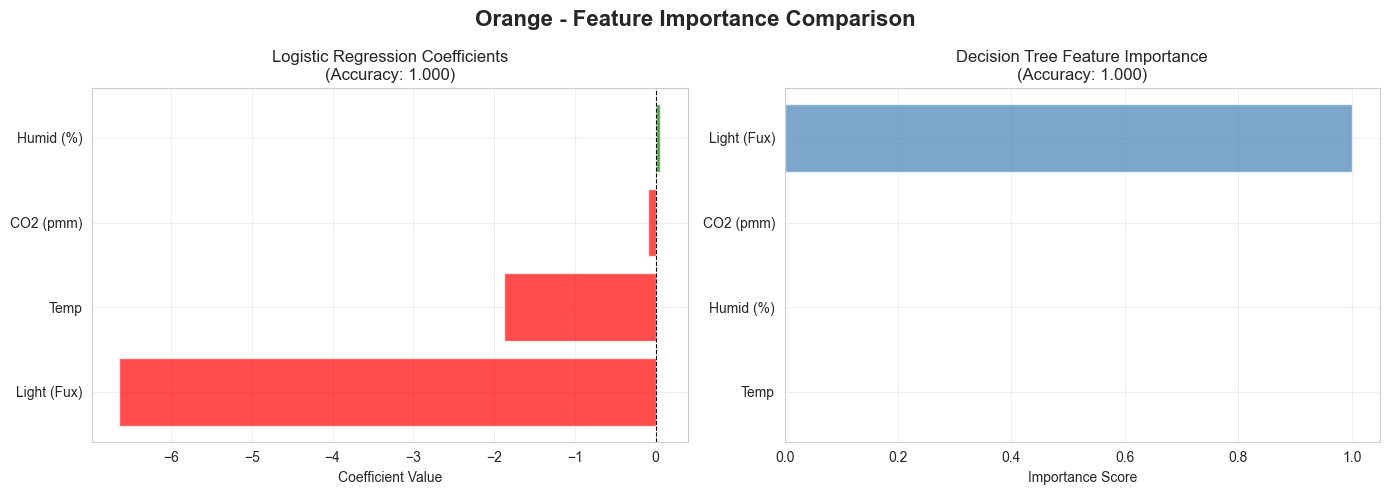

✓ Saved: Orange ROC curve comparison


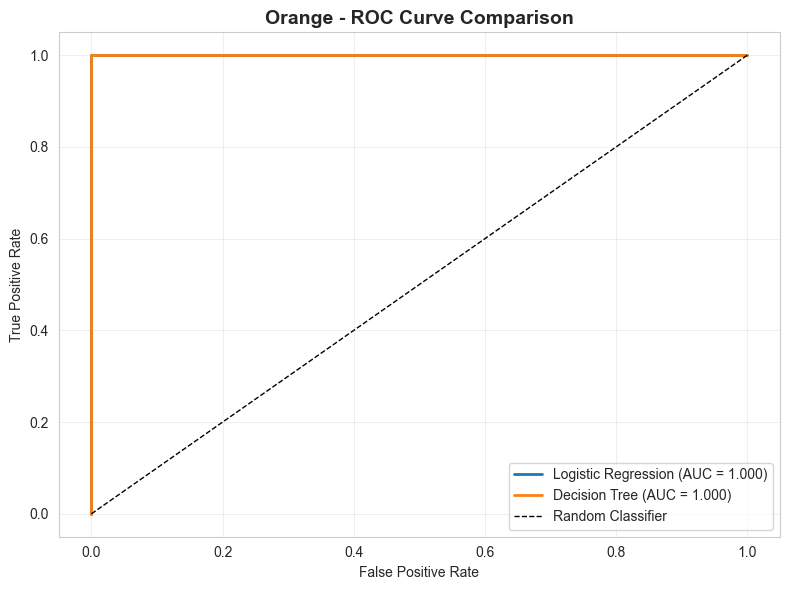


Completed analysis for Orange

ANALYZING: PINEAPPLE
Total samples for Pineapple: 2257

Class Distribution:
Class
Bad     1143
Good    1114
Name: count, dtype: int64
Good: 1114 (49.4%)
Bad: 1143 (50.6%)


Summary Statistics for Pineapple by Quality Class:
--------------------------------------------------------------------------------

Good Quality Pineapple:
              Temp    Humid (%)  Light (Fux)    CO2 (pmm)
count  1114.000000  1114.000000  1114.000000  1114.000000
mean     22.909336    93.164273    13.098402   330.869838
std       0.779247     3.969214     0.648766    14.502846
min      22.000000    80.000000    12.065070   154.000000
25%      22.000000    95.000000    12.621448   323.000000
50%      23.000000    95.000000    12.835854   332.000000
75%      24.000000    95.000000    13.880102   340.000000
max      24.000000    95.000000    14.510789   395.000000

Bad Quality Pineapple:
              Temp  Humid (%)  Light (Fux)    CO2 (pmm)
count  1143.000000     1143.0  1143.

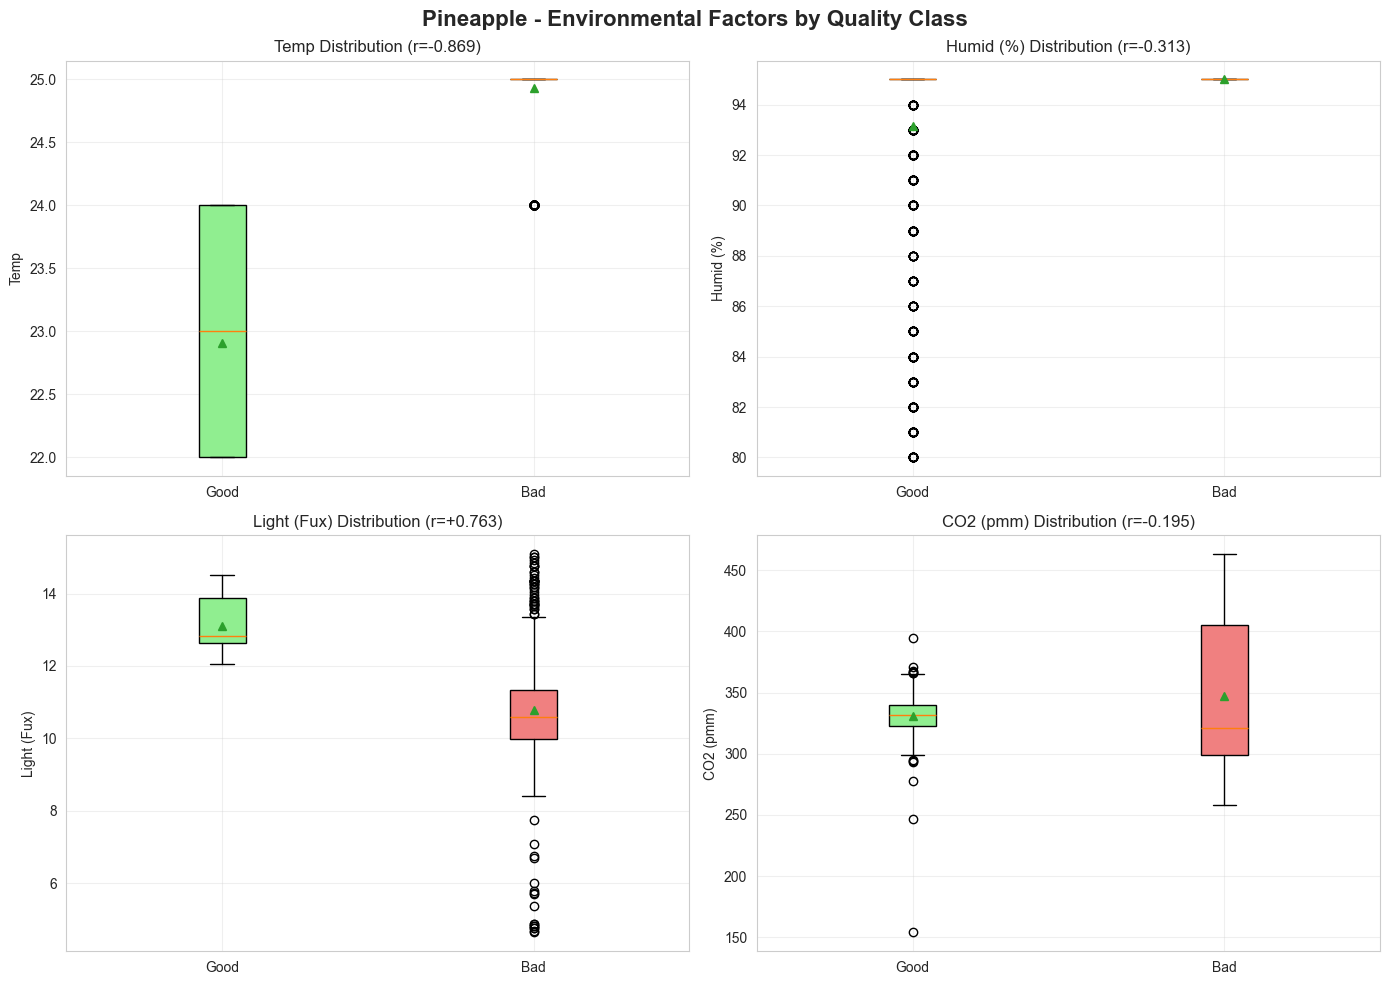

✓ Saved: Pineapple histogram comparison


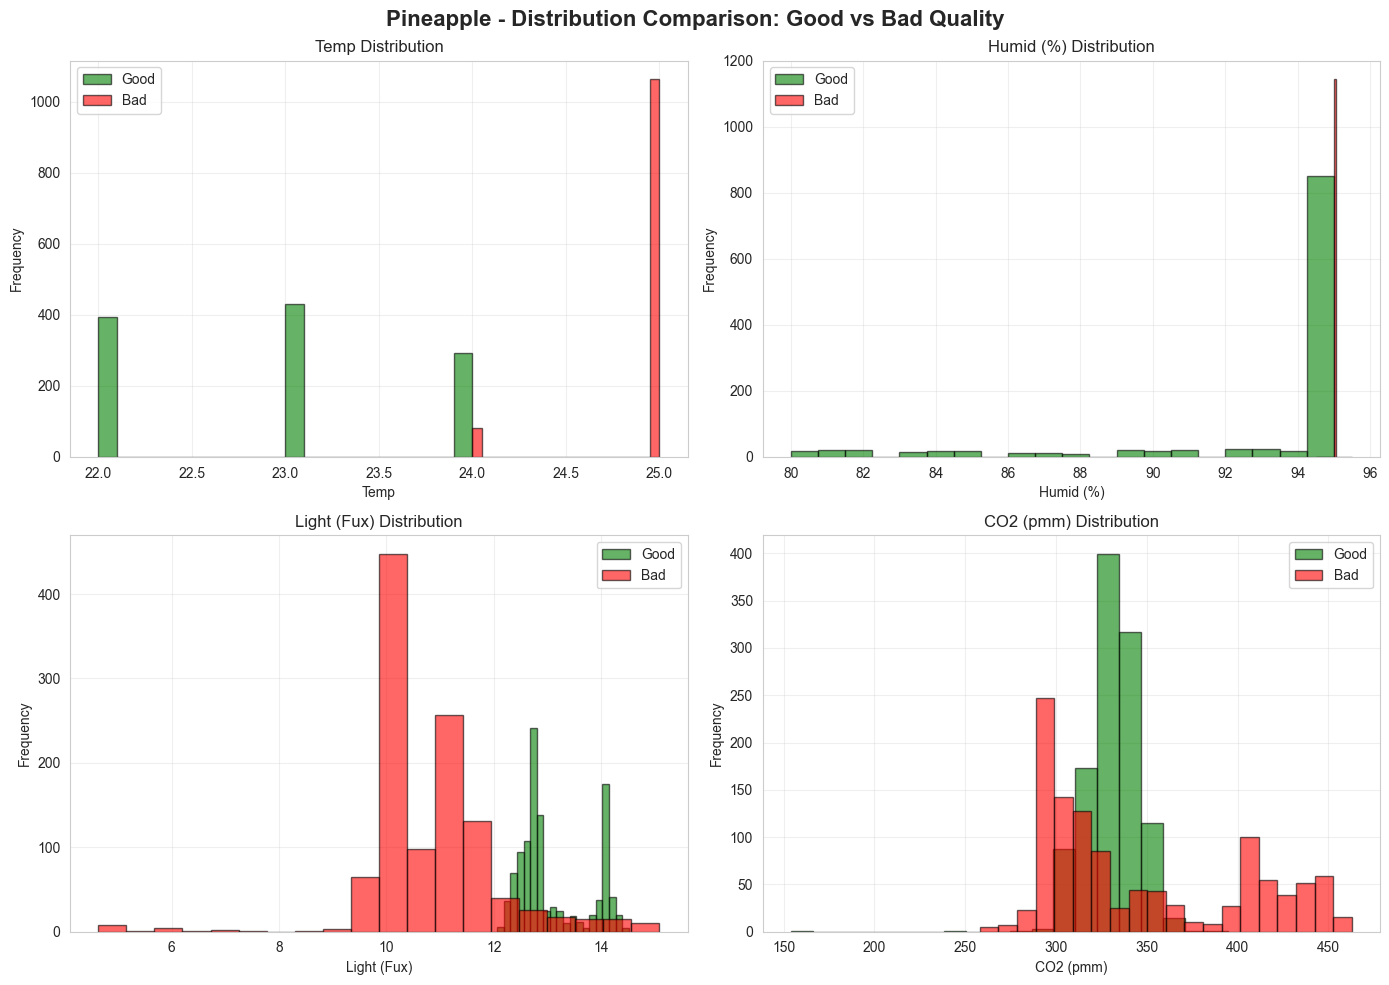

✓ Saved: Pineapple correlation heatmap


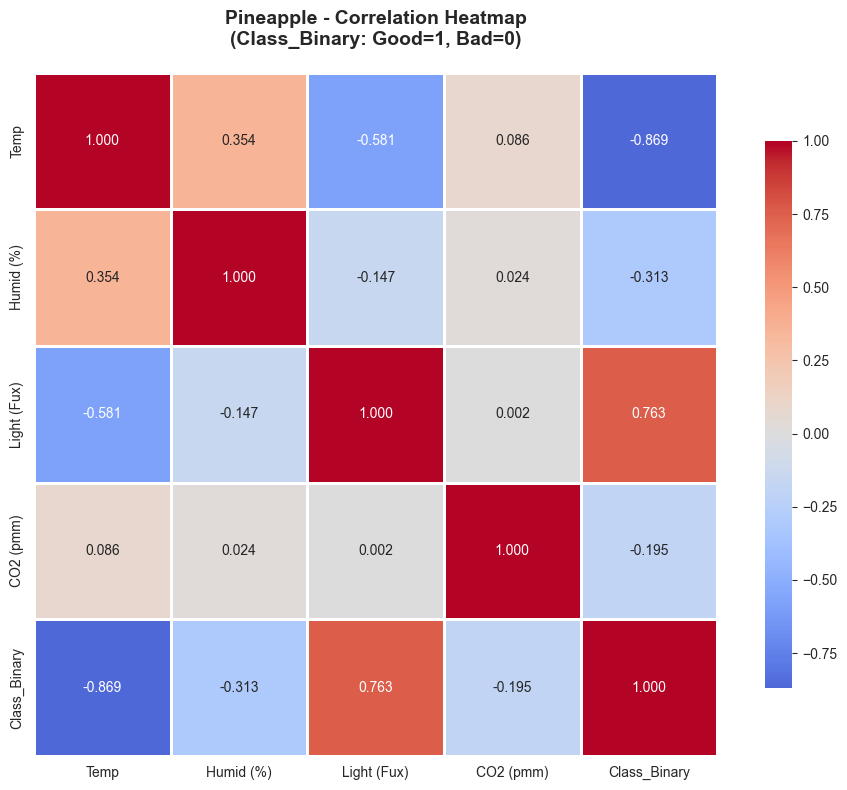


────────────────────────────────────────────────────────────────────────────────
Machine Learning Models for Pineapple
────────────────────────────────────────────────────────────────────────────────
Training set size: 1805 samples
Test set size: 452 samples

Model 1: Logistic Regression
----------------------------------------
Accuracy: 1.0000
AUC-ROC: 1.0000

Feature Importance (Logistic Regression Coefficients):
    Feature  Coefficient  Abs_Coefficient
       Temp    -5.043339         5.043339
Light (Fux)     3.066778         3.066778
  CO2 (pmm)    -2.888137         2.888137
  Humid (%)    -0.567444         0.567444

Model 2: Decision Tree Classifier
----------------------------------------
Accuracy: 1.0000
AUC-ROC: 1.0000

Feature Importance (Decision Tree - Gini Importance):
    Feature  Importance
       Temp    0.869836
  CO2 (pmm)    0.125741
Light (Fux)    0.004423
  Humid (%)    0.000000

Confusion Matrix (Logistic Regression):
[[229   0]
 [  0 223]]

Classification Report

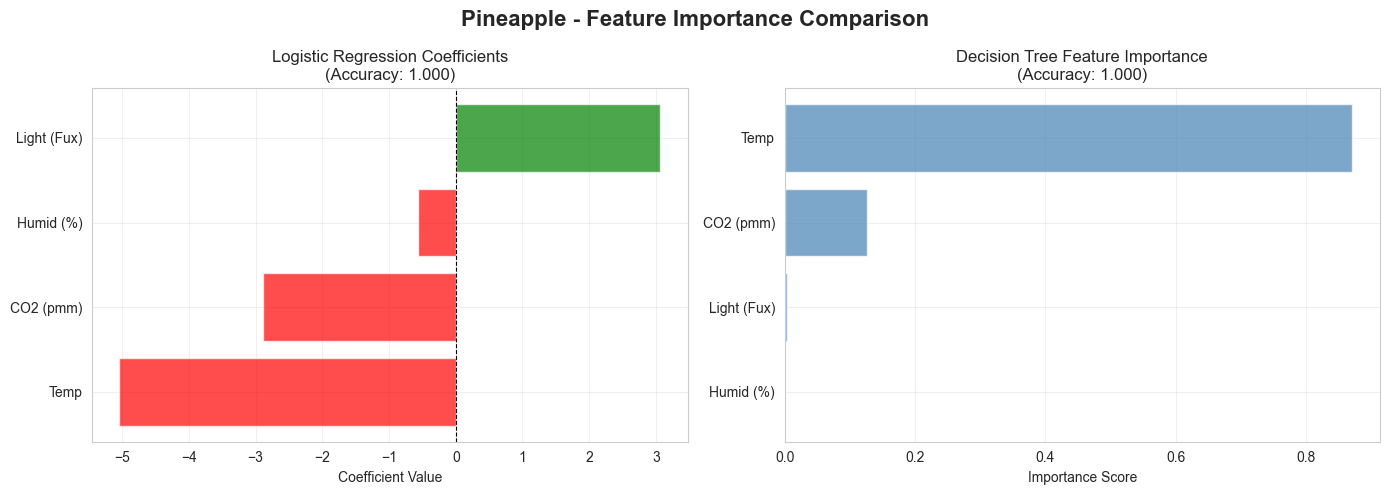

✓ Saved: Pineapple ROC curve comparison


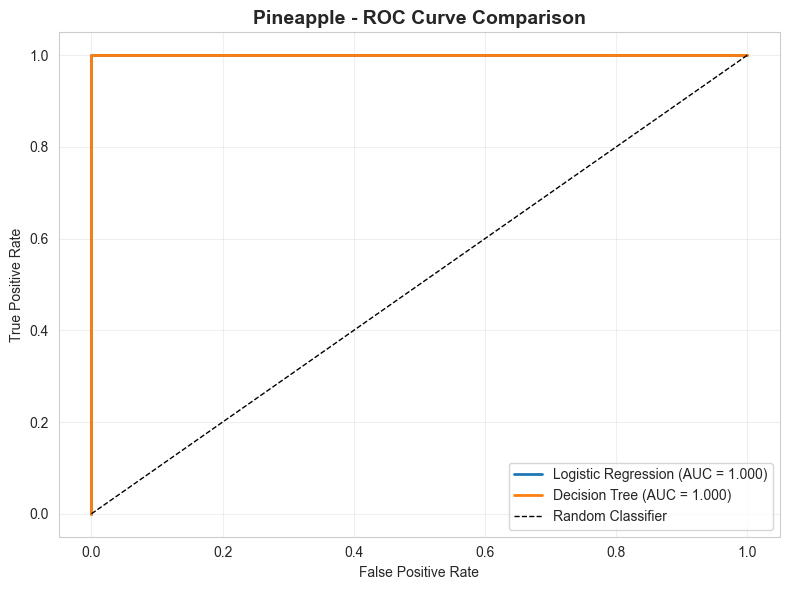


Completed analysis for Pineapple

ANALYZING: BANANA
Total samples for Banana: 1667

Class Distribution:
Class
Good    956
Bad     711
Name: count, dtype: int64
Good: 956 (57.3%)
Bad: 711 (42.7%)


Summary Statistics for Banana by Quality Class:
--------------------------------------------------------------------------------

Good Quality Banana:
             Temp   Humid (%)  Light (Fux)   CO2 (pmm)
count  956.000000  956.000000   956.000000  956.000000
mean    25.397490   90.236402    16.889284  340.217573
std      0.696253    3.400427     2.649116   35.158441
min     24.000000   75.000000     7.088930  194.000000
25%     25.000000   87.000000    14.271273  309.000000
50%     26.000000   90.000000    16.887623  335.000000
75%     26.000000   94.000000    19.420999  377.000000
max     26.000000   95.000000    23.526965  410.000000

Bad Quality Banana:
             Temp   Humid (%)  Light (Fux)   CO2 (pmm)
count  711.000000  711.000000   711.000000  711.000000
mean    24.077356   94.96

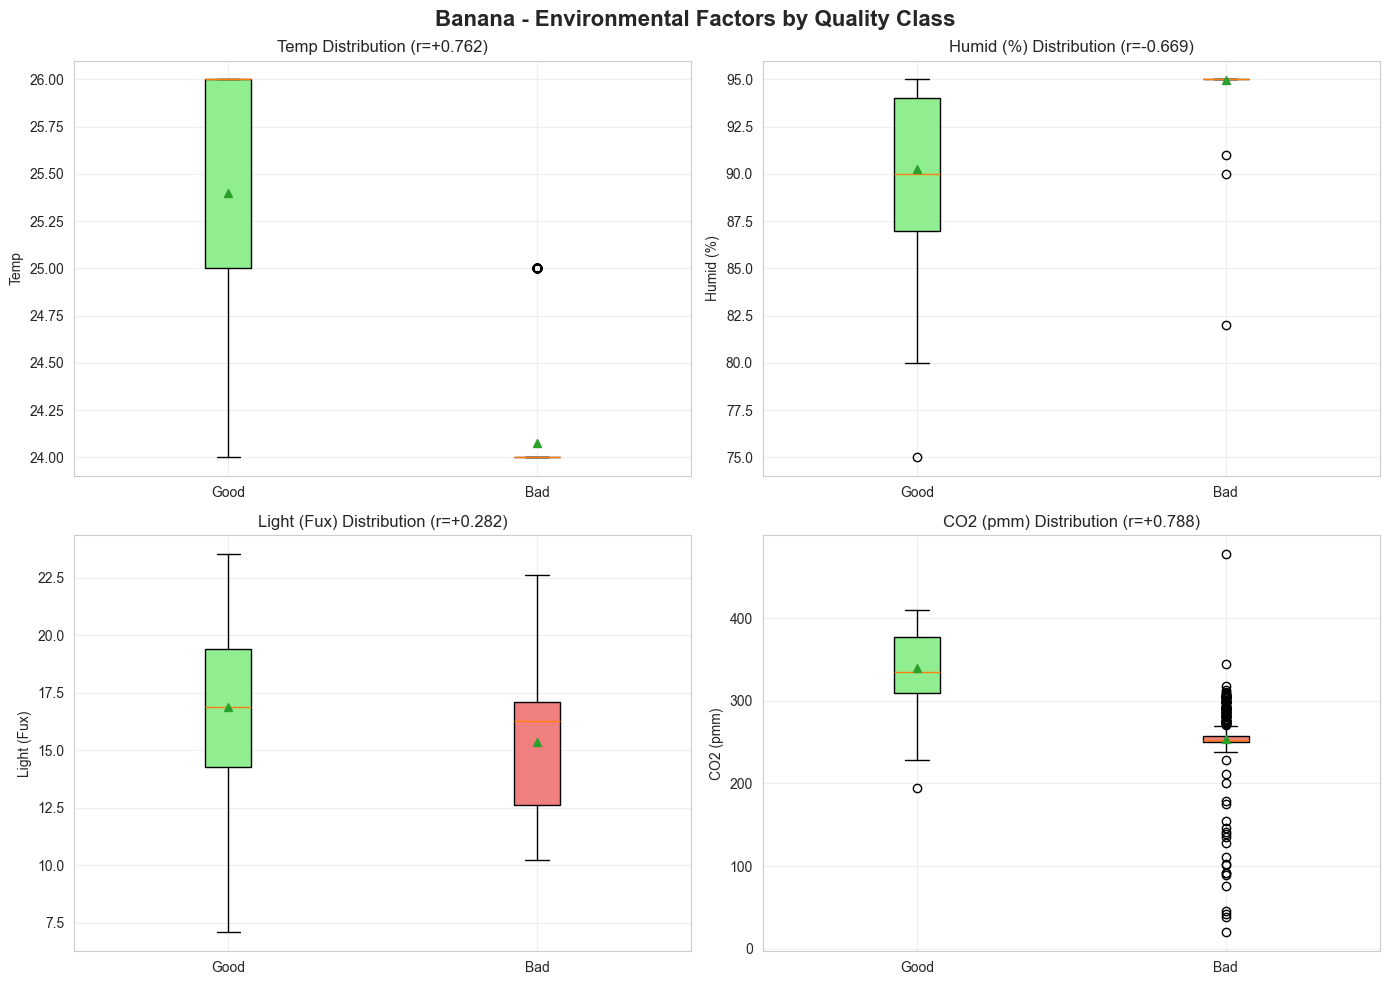

✓ Saved: Banana histogram comparison


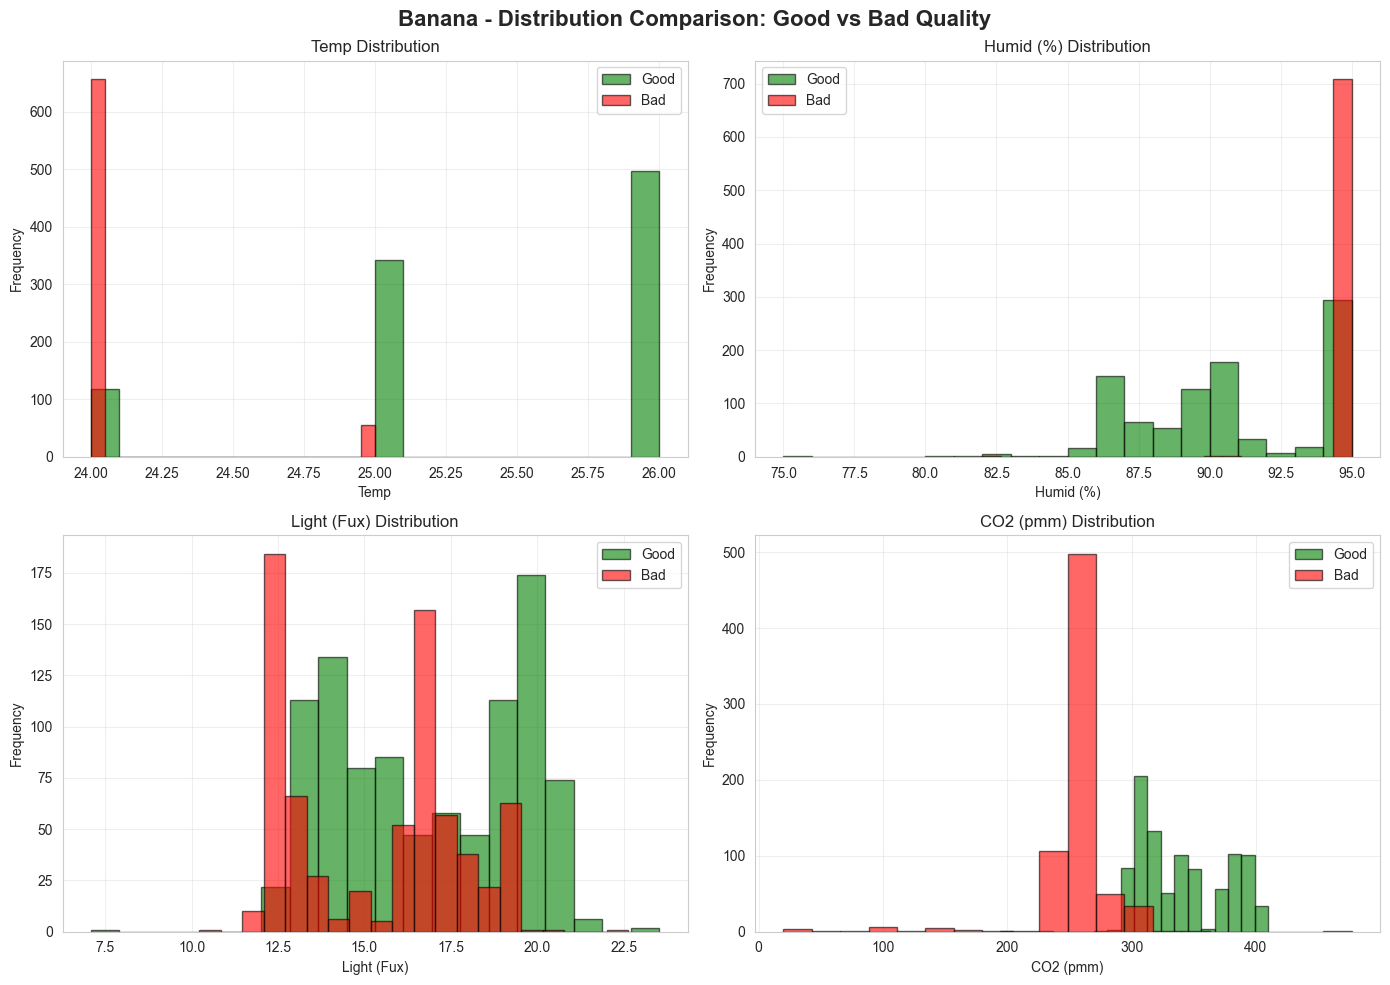

✓ Saved: Banana correlation heatmap


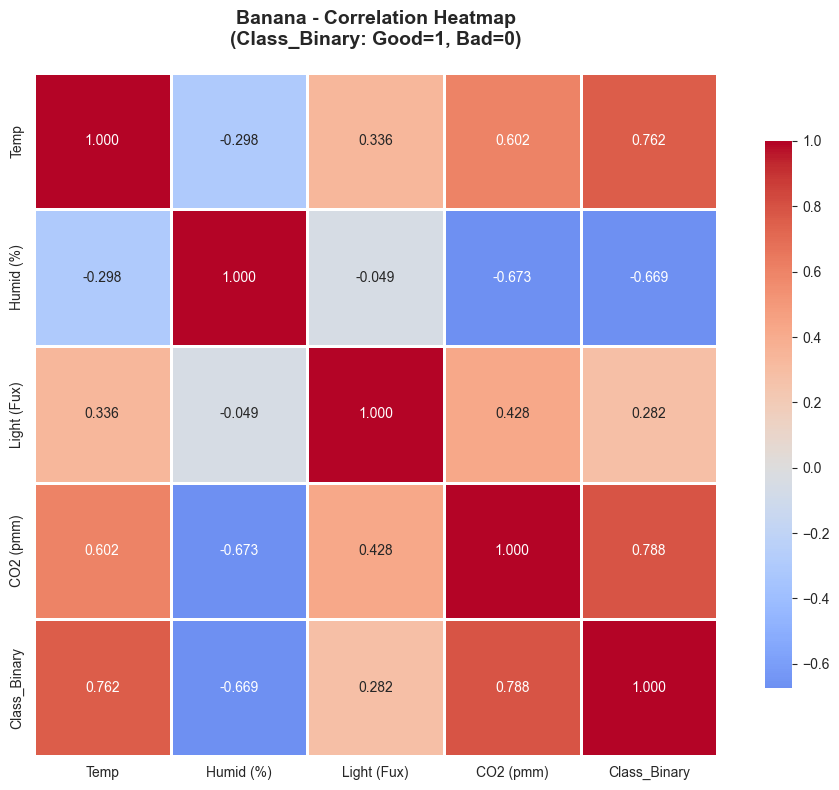


────────────────────────────────────────────────────────────────────────────────
Machine Learning Models for Banana
────────────────────────────────────────────────────────────────────────────────
Training set size: 1333 samples
Test set size: 334 samples

Model 1: Logistic Regression
----------------------------------------
Accuracy: 0.9940
AUC-ROC: 0.9945

Feature Importance (Logistic Regression Coefficients):
    Feature  Coefficient  Abs_Coefficient
  Humid (%)    -3.715264         3.715264
  CO2 (pmm)     3.440573         3.440573
       Temp     3.044091         3.044091
Light (Fux)     1.529220         1.529220

Model 2: Decision Tree Classifier
----------------------------------------
Accuracy: 0.9850
AUC-ROC: 0.9856

Feature Importance (Decision Tree - Gini Importance):
    Feature  Importance
  CO2 (pmm)    0.968937
       Temp    0.017129
Light (Fux)    0.009162
  Humid (%)    0.004772

Confusion Matrix (Logistic Regression):
[[140   2]
 [  0 192]]

Classification Report:
 

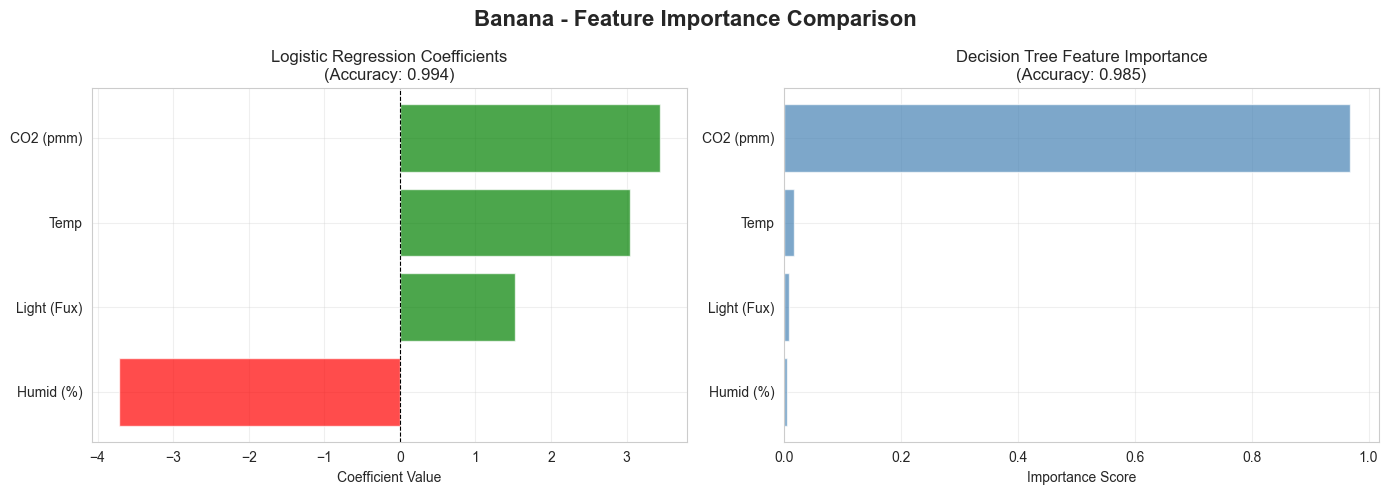

✓ Saved: Banana ROC curve comparison


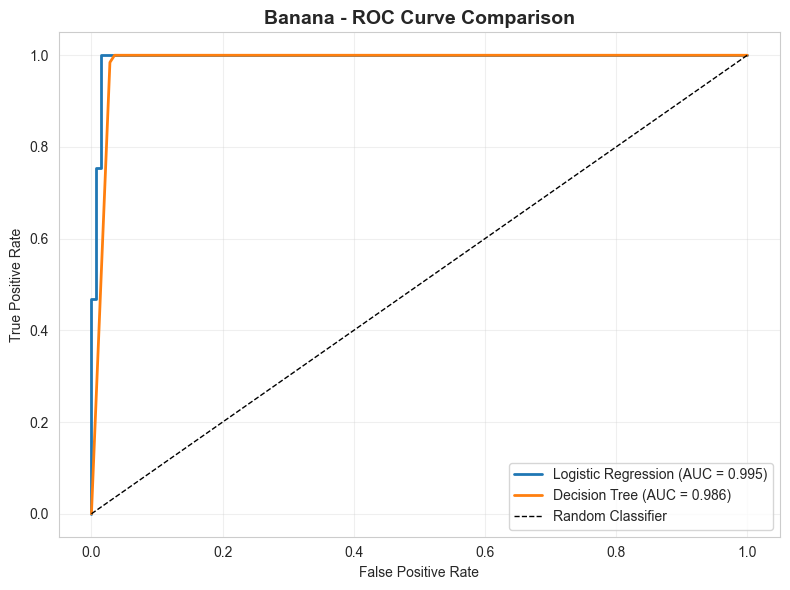


Completed analysis for Banana

ANALYZING: TOMATO
Total samples for Tomato: 3741

Class Distribution:
Class
Good    1916
Bad     1825
Name: count, dtype: int64
Good: 1916 (51.2%)
Bad: 1825 (48.8%)


Summary Statistics for Tomato by Quality Class:
--------------------------------------------------------------------------------

Good Quality Tomato:
              Temp    Humid (%)  Light (Fux)    CO2 (pmm)
count  1916.000000  1916.000000  1916.000000  1916.000000
mean     23.568372    90.275574    10.003395   340.798017
std       1.139842     3.270287     2.586766    51.496543
min      22.000000    71.000000     5.925489    37.000000
25%      23.000000    89.000000     7.777722   302.000000
50%      23.000000    90.000000     9.814452   350.000000
75%      24.000000    92.000000    12.550688   374.000000
max      27.000000    95.000000    18.588612   478.000000

Bad Quality Tomato:
              Temp    Humid (%)  Light (Fux)    CO2 (pmm)
count  1825.000000  1825.000000  1825.000000  182

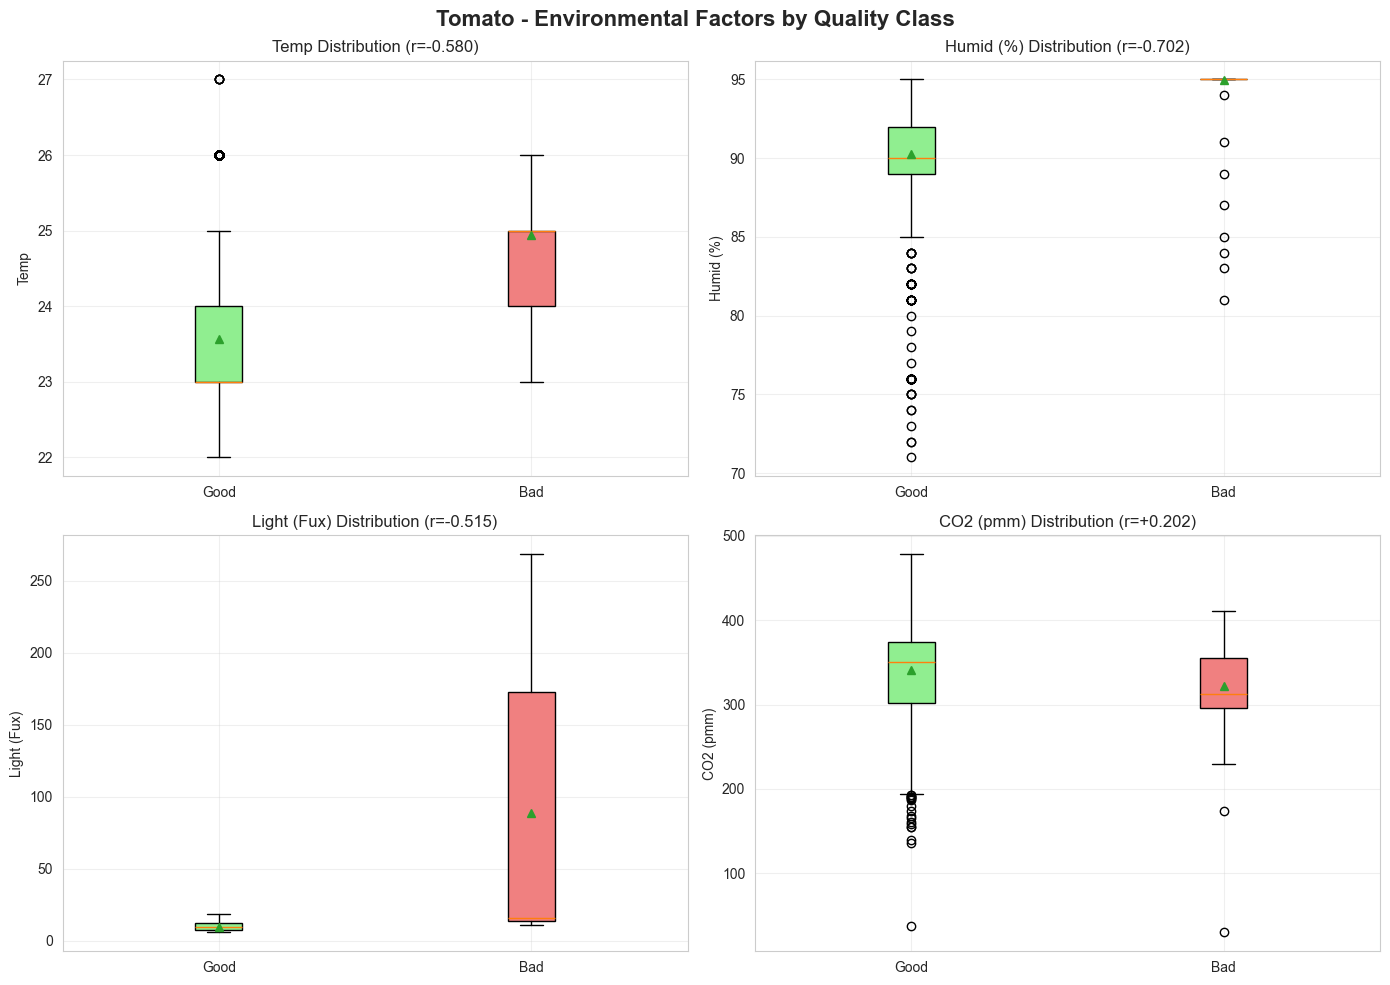

✓ Saved: Tomato histogram comparison


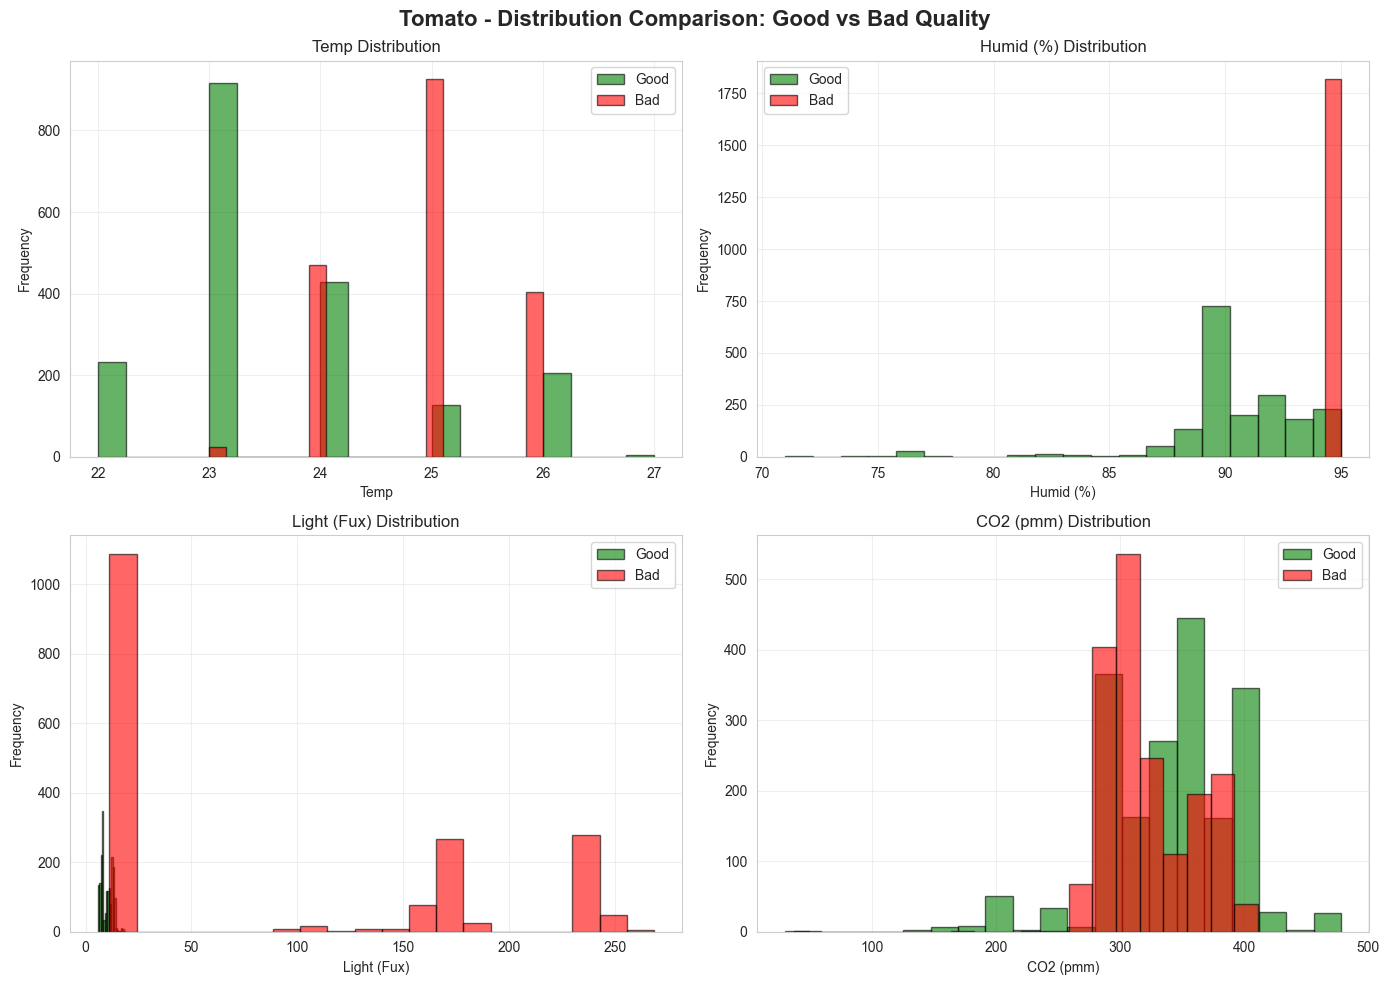

✓ Saved: Tomato correlation heatmap


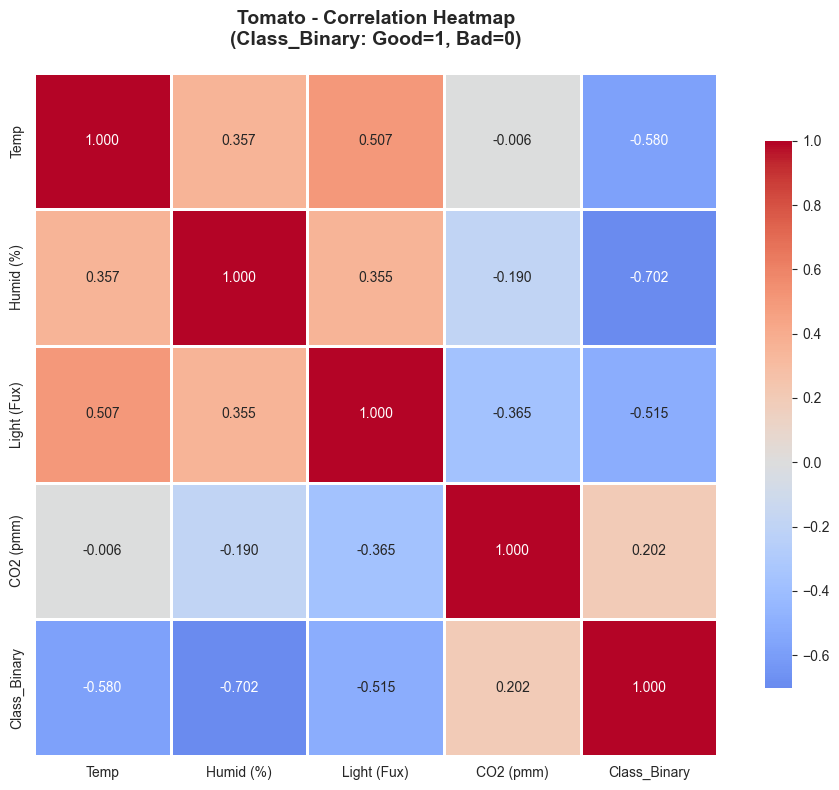


────────────────────────────────────────────────────────────────────────────────
Machine Learning Models for Tomato
────────────────────────────────────────────────────────────────────────────────
Training set size: 2992 samples
Test set size: 749 samples

Model 1: Logistic Regression
----------------------------------------
Accuracy: 0.9626
AUC-ROC: 0.9965

Feature Importance (Logistic Regression Coefficients):
    Feature  Coefficient  Abs_Coefficient
Light (Fux)   -10.040803        10.040803
  Humid (%)    -6.893072         6.893072
       Temp    -0.584817         0.584817
  CO2 (pmm)    -0.118389         0.118389

Model 2: Decision Tree Classifier
----------------------------------------
Accuracy: 0.9987
AUC-ROC: 1.0000

Feature Importance (Decision Tree - Gini Importance):
    Feature  Importance
  Humid (%)    0.867208
Light (Fux)    0.096153
  CO2 (pmm)    0.036639
       Temp    0.000000

Confusion Matrix (Decision Tree):
[[365   0]
 [  1 383]]

Classification Report:
       

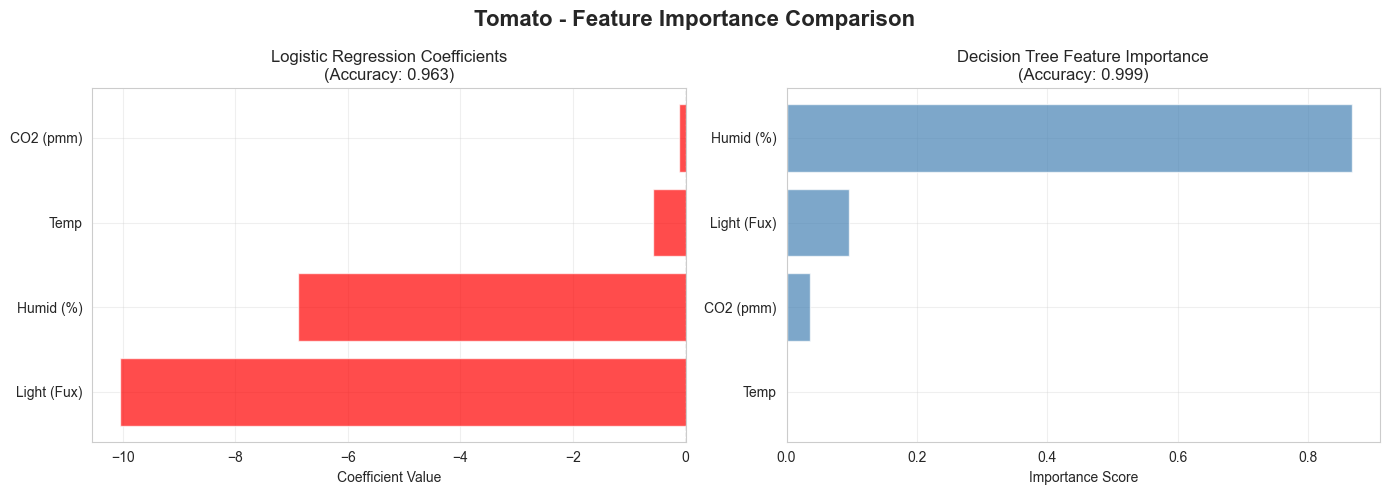

✓ Saved: Tomato ROC curve comparison


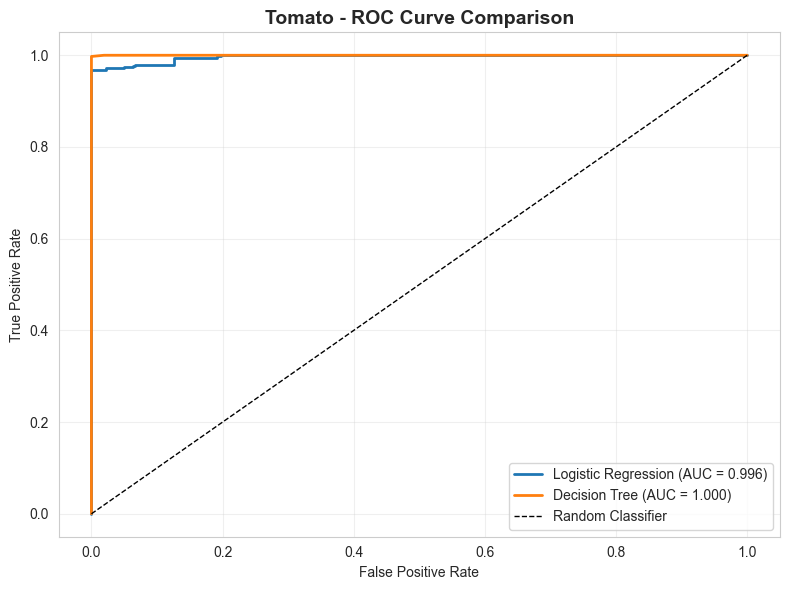


Completed analysis for Tomato


In [11]:
# Analyze each fruit separately
for fruit in fruits:
    print("\n" + "="*80)
    print(f"ANALYZING: {fruit.upper()}")
    print("="*80)
    
    # Filter data for specific fruit
    fruit_df = df[df['Fruit'] == fruit].copy()
    print(f"Total samples for {fruit}: {len(fruit_df)}")
    
    # Class distribution for this fruit
    class_dist = fruit_df['Class'].value_counts()
    print(f"\nClass Distribution:")
    print(class_dist)
    print(f"Good: {class_dist.get('Good', 0)} ({class_dist.get('Good', 0)/len(fruit_df)*100:.1f}%)")
    print(f"Bad: {class_dist.get('Bad', 0)} ({class_dist.get('Bad', 0)/len(fruit_df)*100:.1f}%)")
    print()
    
    # Summary statistics by class
    print(f"\nSummary Statistics for {fruit} by Quality Class:")
    print("-" * 80)
    for quality in ['Good', 'Bad']:
        if quality in fruit_df['Class'].values:
            print(f"\n{quality} Quality {fruit}:")
            print(fruit_df[fruit_df['Class'] == quality][environmental_factors].describe())
    
    # -------------------------------------------------------------------------
    # Correlation Analysis
    # -------------------------------------------------------------------------
    print(f"\n{'─'*80}")
    print(f"Correlation Analysis for {fruit}")
    print("─"*80)
    
    # Encode Class as binary (Good=1, Bad=0)
    fruit_df['Class_Binary'] = (fruit_df['Class'] == 'Good').astype(int)
    
    # Calculate correlation between each factor and quality
    correlations = {}
    for factor in environmental_factors:
        corr = fruit_df[factor].corr(fruit_df['Class_Binary'])
        correlations[factor] = corr
        print(f"{factor:20s}: {corr:+.4f}")
    
    # Statistical tests (t-tests) for each factor
    print(f"\nStatistical Significance Tests (t-tests):")
    print("-" * 80)
    for factor in environmental_factors:
        good_values = fruit_df[fruit_df['Class'] == 'Good'][factor]
        bad_values = fruit_df[fruit_df['Class'] == 'Bad'][factor]
        
        t_stat, p_value = stats.ttest_ind(good_values, bad_values)
        significant = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "NS"
        
        print(f"{factor:20s}: t={t_stat:+.4f}, p={p_value:.6f} {significant}")
    
    print("\nLegend: *** p<0.001, ** p<0.01, * p<0.05, NS = Not Significant")
    
    # -------------------------------------------------------------------------
    # Visualizations for this fruit
    # -------------------------------------------------------------------------
    
    # 1. Boxplots comparing Good vs Bad for each environmental factor
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'{fruit} - Environmental Factors by Quality Class', fontsize=16, fontweight='bold')
    
    for idx, factor in enumerate(environmental_factors):
        ax = axes[idx // 2, idx % 2]
        
        # Create boxplot
        good_data = fruit_df[fruit_df['Class'] == 'Good'][factor]
        bad_data = fruit_df[fruit_df['Class'] == 'Bad'][factor]
        
        bp = ax.boxplot([good_data, bad_data], 
                        labels=['Good', 'Bad'],
                        patch_artist=True,
                        showmeans=True)
        
        # Color the boxes
        bp['boxes'][0].set_facecolor('lightgreen')
        bp['boxes'][1].set_facecolor('lightcoral')
        
        ax.set_ylabel(factor)
        ax.set_title(f'{factor} Distribution (r={correlations[factor]:+.3f})')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'analysis_results/{fruit}_01_boxplots.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Saved: {fruit} boxplot comparison")
    plt.show()
    
    # 2. Histograms with overlay
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'{fruit} - Distribution Comparison: Good vs Bad Quality', fontsize=16, fontweight='bold')
    
    for idx, factor in enumerate(environmental_factors):
        ax = axes[idx // 2, idx % 2]
        
        good_data = fruit_df[fruit_df['Class'] == 'Good'][factor]
        bad_data = fruit_df[fruit_df['Class'] == 'Bad'][factor]
        
        ax.hist(good_data, bins=20, alpha=0.6, label='Good', color='green', edgecolor='black')
        ax.hist(bad_data, bins=20, alpha=0.6, label='Bad', color='red', edgecolor='black')
        
        ax.set_xlabel(factor)
        ax.set_ylabel('Frequency')
        ax.set_title(f'{factor} Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'analysis_results/{fruit}_02_histograms.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {fruit} histogram comparison")
    plt.show()
    
    # 3. Correlation heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    correlation_matrix = fruit_df[environmental_factors + ['Class_Binary']].corr()
    
    sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                ax=ax)
    
    ax.set_title(f'{fruit} - Correlation Heatmap\n(Class_Binary: Good=1, Bad=0)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(f'analysis_results/{fruit}_03_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {fruit} correlation heatmap")
    plt.show()
    
    # -------------------------------------------------------------------------
    # Machine Learning Model
    # -------------------------------------------------------------------------
    print(f"\n{'─'*80}")
    print(f"Machine Learning Models for {fruit}")
    print("─"*80)
    
    # Prepare data for modeling
    X = fruit_df[environmental_factors].values
    y = fruit_df['Class_Binary'].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Training set size: {len(X_train)} samples")
    print(f"Test set size: {len(X_test)} samples")
    print()
    
    # Model 1: Logistic Regression
    print("Model 1: Logistic Regression")
    print("-" * 40)
    
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_scaled, y_train)
    
    y_pred_lr = lr_model.predict(X_test_scaled)
    y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
    
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    lr_auc = roc_auc_score(y_test, y_pred_proba_lr)
    
    print(f"Accuracy: {lr_accuracy:.4f}")
    print(f"AUC-ROC: {lr_auc:.4f}")
    print()
    
    # Feature importance from coefficients
    print("Feature Importance (Logistic Regression Coefficients):")
    lr_coefficients = pd.DataFrame({
        'Feature': environmental_factors,
        'Coefficient': lr_model.coef_[0],
        'Abs_Coefficient': np.abs(lr_model.coef_[0])
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print(lr_coefficients.to_string(index=False))
    print()
    
    # Model 2: Decision Tree
    print("Model 2: Decision Tree Classifier")
    print("-" * 40)
    
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)
    dt_model.fit(X_train, y_train)
    
    y_pred_dt = dt_model.predict(X_test)
    y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
    
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    dt_auc = roc_auc_score(y_test, y_pred_proba_dt)
    
    print(f"Accuracy: {dt_accuracy:.4f}")
    print(f"AUC-ROC: {dt_auc:.4f}")
    print()
    
    # Feature importance from decision tree
    print("Feature Importance (Decision Tree - Gini Importance):")
    dt_importance = pd.DataFrame({
        'Feature': environmental_factors,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(dt_importance.to_string(index=False))
    print()
    
    # Confusion Matrix for best model
    best_model_name = "Logistic Regression" if lr_accuracy >= dt_accuracy else "Decision Tree"
    best_y_pred = y_pred_lr if lr_accuracy >= dt_accuracy else y_pred_dt
    
    print(f"Confusion Matrix ({best_model_name}):")
    cm = confusion_matrix(y_test, best_y_pred)
    print(cm)
    print()
    
    print("Classification Report:")
    print(classification_report(y_test, best_y_pred, target_names=['Bad', 'Good']))
    
    # Plot feature importance comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'{fruit} - Feature Importance Comparison', fontsize=16, fontweight='bold')
    
    # Logistic Regression coefficients
    lr_coefficients_sorted = lr_coefficients.sort_values('Coefficient')
    colors = ['red' if x < 0 else 'green' for x in lr_coefficients_sorted['Coefficient']]
    ax1.barh(lr_coefficients_sorted['Feature'], lr_coefficients_sorted['Coefficient'], color=colors, alpha=0.7)
    ax1.set_xlabel('Coefficient Value')
    ax1.set_title(f'Logistic Regression Coefficients\n(Accuracy: {lr_accuracy:.3f})')
    ax1.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    ax1.grid(True, alpha=0.3)
    
    # Decision Tree importance
    dt_importance_sorted = dt_importance.sort_values('Importance')
    ax2.barh(dt_importance_sorted['Feature'], dt_importance_sorted['Importance'], color='steelblue', alpha=0.7)
    ax2.set_xlabel('Importance Score')
    ax2.set_title(f'Decision Tree Feature Importance\n(Accuracy: {dt_accuracy:.3f})')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'analysis_results/{fruit}_04_feature_importance.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Saved: {fruit} feature importance comparison")
    plt.show()
    
    # ROC Curve comparison
    fig, ax = plt.subplots(figsize=(8, 6))
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
    
    ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2)
    ax.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_auc:.3f})', linewidth=2)
    ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'{fruit} - ROC Curve Comparison', fontsize=14, fontweight='bold')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'analysis_results/{fruit}_05_roc_curve.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {fruit} ROC curve comparison")
    plt.show()
    
    # -------------------------------------------------------------------------
    # Store insights for final summary
    # -------------------------------------------------------------------------
    
    # Get top 2 most important features from both models
    top_lr_features = lr_coefficients.nlargest(2, 'Abs_Coefficient')['Feature'].tolist()
    top_dt_features = dt_importance.nlargest(2, 'Importance')['Feature'].tolist()
    
    # Calculate mean values for Good vs Bad
    factor_means = {}
    for factor in environmental_factors:
        good_mean = fruit_df[fruit_df['Class'] == 'Good'][factor].mean()
        bad_mean = fruit_df[fruit_df['Class'] == 'Bad'][factor].mean()
        factor_means[factor] = {
            'good_mean': good_mean,
            'bad_mean': bad_mean,
            'difference': good_mean - bad_mean
        }
    
    fruit_insights[fruit] = {
        'sample_count': len(fruit_df),
        'good_count': class_dist.get('Good', 0),
        'bad_count': class_dist.get('Bad', 0),
        'correlations': correlations,
        'lr_accuracy': lr_accuracy,
        'dt_accuracy': dt_accuracy,
        'lr_auc': lr_auc,
        'dt_auc': dt_auc,
        'top_lr_features': top_lr_features,
        'top_dt_features': top_dt_features,
        'lr_coefficients': lr_coefficients,
        'dt_importance': dt_importance,
        'factor_means': factor_means
    }
    
    print(f"\n{'='*80}")
    print(f"Completed analysis for {fruit}")
    print("="*80)

## SECTION 5: Comprehensive Summary and Insights

In [12]:
print("\n\n" + "="*80)
print("STEP 4: COMPREHENSIVE SUMMARY AND KEY INSIGHTS")
print("="*80)
print()

# Create summary report
summary_report = []

for fruit in fruits:
    insights = fruit_insights[fruit]
    
    print(f"\n{'▶'*40}")
    print(f"{'▶'*40}")
    print(f"FRUIT: {fruit.upper()}")
    print(f"{'▶'*40}")
    print(f"{'▶'*40}")
    print()
    
    print(f"Dataset Summary:")
    print(f"  • Total samples: {insights['sample_count']}")
    print(f"  • Good quality: {insights['good_count']} ({insights['good_count']/insights['sample_count']*100:.1f}%)")
    print(f"  • Bad quality: {insights['bad_count']} ({insights['bad_count']/insights['sample_count']*100:.1f}%)")
    print()
    
    print(f"Model Performance:")
    print(f"  • Logistic Regression - Accuracy: {insights['lr_accuracy']:.4f}, AUC: {insights['lr_auc']:.4f}")
    print(f"  • Decision Tree - Accuracy: {insights['dt_accuracy']:.4f}, AUC: {insights['dt_auc']:.4f}")
    print()
    
    # Determine most influential factors
    print(f"Top Influencing Factors (by model):")
    print(f"  • Logistic Regression: {', '.join(insights['top_lr_features'])}")
    print(f"  • Decision Tree: {', '.join(insights['top_dt_features'])}")
    print()
    
    # Correlation insights
    print(f"Correlation with Quality (Good=1, Bad=0):")
    sorted_corr = sorted(insights['correlations'].items(), key=lambda x: abs(x[1]), reverse=True)
    for factor, corr in sorted_corr:
        direction = "↑ Higher" if corr > 0 else "↓ Lower"
        print(f"  • {factor:20s}: {corr:+.4f} ({direction} values → Good quality)")
    print()
    
    # Mean value comparisons
    print(f"Mean Values Comparison (Good vs Bad):")
    print(f"{'Factor':<20s} {'Good Quality':>15s} {'Bad Quality':>15s} {'Difference':>15s}")
    print("-" * 70)
    for factor in environmental_factors:
        good_mean = insights['factor_means'][factor]['good_mean']
        bad_mean = insights['factor_means'][factor]['bad_mean']
        diff = insights['factor_means'][factor]['difference']
        print(f"{factor:<20s} {good_mean:>15.2f} {bad_mean:>15.2f} {diff:>+15.2f}")
    print()
    
    # Key findings and recommendations
    print(f"KEY FINDINGS & RECOMMENDATIONS:")
    print("─" * 80)
    
    # Identify the single most important factor
    most_important_factor = sorted_corr[0][0]
    most_important_corr = sorted_corr[0][1]
    
    factor_means = insights['factor_means'][most_important_factor]
    
    print(f"1. PRIMARY DRIVER: {most_important_factor}")
    print(f"   • Correlation coefficient: {most_important_corr:+.4f}")
    print(f"   • Good quality average: {factor_means['good_mean']:.2f}")
    print(f"   • Bad quality average: {factor_means['bad_mean']:.2f}")
    
    if most_important_corr > 0:
        print(f"   • RECOMMENDATION: Maintain {most_important_factor} at HIGHER levels")
        print(f"     (ideally above {factor_means['good_mean']:.2f}) for optimal {fruit} quality.")
    else:
        print(f"   • RECOMMENDATION: Maintain {most_important_factor} at LOWER levels")
        print(f"     (ideally below {factor_means['good_mean']:.2f}) for optimal {fruit} quality.")
    print()
    
    # Secondary factors
    if len(sorted_corr) > 1:
        secondary_factor = sorted_corr[1][0]
        secondary_corr = sorted_corr[1][1]
        secondary_means = insights['factor_means'][secondary_factor]
        
        print(f"2. SECONDARY FACTOR: {secondary_factor}")
        print(f"   • Correlation coefficient: {secondary_corr:+.4f}")
        print(f"   • Good quality average: {secondary_means['good_mean']:.2f}")
        print(f"   • Bad quality average: {secondary_means['bad_mean']:.2f}")
        
        if secondary_corr > 0:
            print(f"   • Monitor and maintain at levels above {secondary_means['good_mean']:.2f}")
        else:
            print(f"   • Monitor and maintain at levels below {secondary_means['good_mean']:.2f}")
        print()
    
    # Identify optimal ranges
    print(f"3. OPTIMAL ENVIRONMENTAL RANGES for Good Quality {fruit}:")
    for factor in environmental_factors:
        good_values = df[(df['Fruit'] == fruit) & (df['Class'] == 'Good')][factor]
        q1, q3 = good_values.quantile(0.25), good_values.quantile(0.75)
        median = good_values.median()
        print(f"   • {factor:20s}: {q1:.2f} - {q3:.2f} (median: {median:.2f})")
    print()
    
    # Add to summary report
    summary_report.append({
        'Fruit': fruit,
        'Primary_Factor': most_important_factor,
        'Primary_Correlation': most_important_corr,
        'Secondary_Factor': sorted_corr[1][0] if len(sorted_corr) > 1 else 'N/A',
        'LR_Accuracy': insights['lr_accuracy'],
        'DT_Accuracy': insights['dt_accuracy']
    })



STEP 4: COMPREHENSIVE SUMMARY AND KEY INSIGHTS


▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶
▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶
FRUIT: ORANGE
▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶
▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶

Dataset Summary:
  • Total samples: 3330
  • Good quality: 1681 (50.5%)
  • Bad quality: 1649 (49.5%)

Model Performance:
  • Logistic Regression - Accuracy: 1.0000, AUC: 1.0000
  • Decision Tree - Accuracy: 1.0000, AUC: 1.0000

Top Influencing Factors (by model):
  • Logistic Regression: Light (Fux), Temp
  • Decision Tree: Light (Fux), Temp

Correlation with Quality (Good=1, Bad=0):
  • Light (Fux)         : -0.9376 (↓ Lower values → Good quality)
  • Temp                : -0.7261 (↓ Lower values → Good quality)
  • CO2 (pmm)           : -0.2388 (↓ Lower values → Good quality)
  • Humid (%)           : -0.0779 (↓ Lower values → Good quality)

Mean Values Comparison (Good vs Bad):
Factor                  Good Quality     Bad Quality      Difference
----------

## SECTION 6: Comparative Analysis Across All Fruits

In [13]:
print("\n\n" + "="*80)
print("STEP 5: COMPARATIVE ANALYSIS ACROSS ALL FRUITS")
print("="*80)
print()

# Create summary table
summary_df = pd.DataFrame(summary_report)
print("Summary Table:")
print(summary_df.to_string(index=False))
print()



STEP 5: COMPARATIVE ANALYSIS ACROSS ALL FRUITS

Summary Table:
    Fruit Primary_Factor  Primary_Correlation Secondary_Factor  LR_Accuracy  DT_Accuracy
   Orange    Light (Fux)            -0.937607             Temp     1.000000     1.000000
Pineapple           Temp            -0.868517      Light (Fux)     1.000000     1.000000
   Banana      CO2 (pmm)             0.788055             Temp     0.994012     0.985030
   Tomato      Humid (%)            -0.701902             Temp     0.962617     0.998665



✓ Saved: Comparative analysis across all fruits


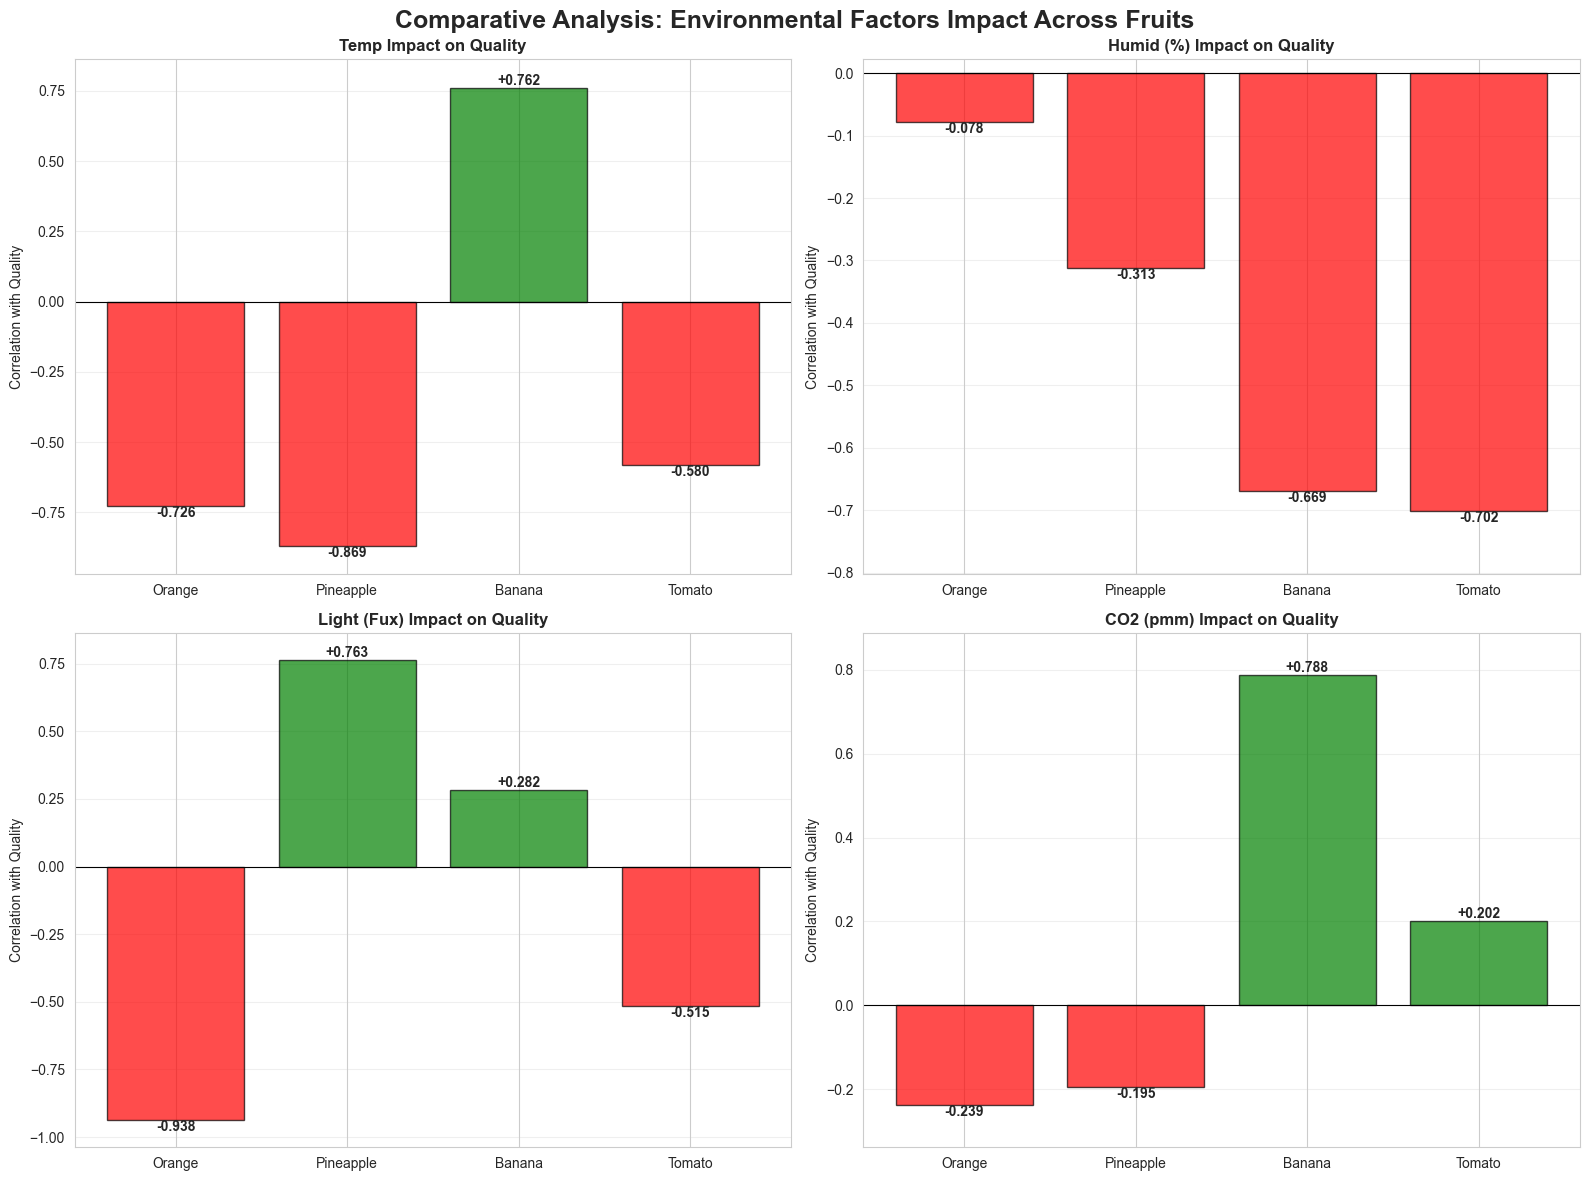

In [14]:
# Visualize comparative analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparative Analysis: Environmental Factors Impact Across Fruits', 
             fontsize=18, fontweight='bold')

for idx, factor in enumerate(environmental_factors):
    ax = axes[idx // 2, idx % 2]
    
    # Prepare data for plotting
    fruit_names = []
    correlations_list = []
    
    for fruit in fruits:
        fruit_names.append(fruit)
        correlations_list.append(fruit_insights[fruit]['correlations'][factor])
    
    # Create bar plot
    colors = ['green' if c > 0 else 'red' for c in correlations_list]
    bars = ax.bar(fruit_names, correlations_list, color=colors, alpha=0.7, edgecolor='black')
    
    # Add value labels on bars
    for bar, value in zip(bars, correlations_list):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:+.3f}',
                ha='center', va='bottom' if height > 0 else 'top',
                fontweight='bold')
    
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    ax.set_ylabel('Correlation with Quality')
    ax.set_title(f'{factor} Impact on Quality', fontweight='bold')
    ax.set_ylim([min(correlations_list) - 0.1, max(correlations_list) + 0.1])
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('analysis_results/06_comparative_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Comparative analysis across all fruits")
plt.show()

✓ Saved: Model performance comparison


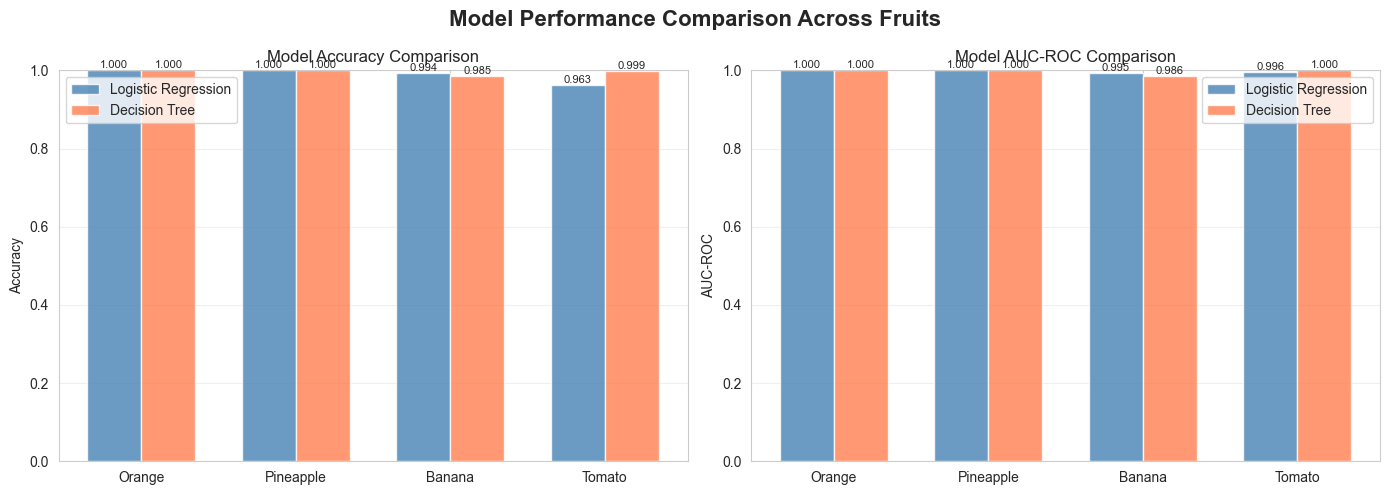

In [15]:
# Model accuracy comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Model Performance Comparison Across Fruits', fontsize=16, fontweight='bold')

fruit_names = list(fruits)
lr_accuracies = [fruit_insights[f]['lr_accuracy'] for f in fruit_names]
dt_accuracies = [fruit_insights[f]['dt_accuracy'] for f in fruit_names]

x = np.arange(len(fruit_names))
width = 0.35

bars1 = ax1.bar(x - width/2, lr_accuracies, width, label='Logistic Regression', 
                color='steelblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, dt_accuracies, width, label='Decision Tree', 
                color='coral', alpha=0.8)

ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(fruit_names)
ax1.legend()
ax1.set_ylim([0, 1])
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

# AUC comparison
lr_aucs = [fruit_insights[f]['lr_auc'] for f in fruit_names]
dt_aucs = [fruit_insights[f]['dt_auc'] for f in fruit_names]

bars3 = ax2.bar(x - width/2, lr_aucs, width, label='Logistic Regression', 
                color='steelblue', alpha=0.8)
bars4 = ax2.bar(x + width/2, dt_aucs, width, label='Decision Tree', 
                color='coral', alpha=0.8)

ax2.set_ylabel('AUC-ROC')
ax2.set_title('Model AUC-ROC Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(fruit_names)
ax2.legend()
ax2.set_ylim([0, 1])
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('analysis_results/07_model_performance_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Model performance comparison")
plt.show()

## SECTION 7: Final Conclusions

In [16]:
print("\n\n" + "="*80)
print("FINAL CONCLUSIONS & ACTIONABLE INSIGHTS")
print("="*80)
print()

print("This comprehensive analysis reveals the following key findings:\n")

for i, fruit in enumerate(fruits, 1):
    insights = fruit_insights[fruit]
    sorted_corr = sorted(insights['correlations'].items(), key=lambda x: abs(x[1]), reverse=True)
    primary_factor = sorted_corr[0][0]
    primary_corr = sorted_corr[0][1]
    
    print(f"{i}. {fruit.upper()}:")
    print(f"   Most influential factor: {primary_factor} (correlation: {primary_corr:+.4f})")
    
    if primary_corr > 0:
        print(f"   → INCREASE {primary_factor} to improve quality")
    else:
        print(f"   → DECREASE {primary_factor} to improve quality")
    
    print(f"   Best model: {'Logistic Regression' if insights['lr_accuracy'] >= insights['dt_accuracy'] else 'Decision Tree'}")
    print(f"   Prediction accuracy: {max(insights['lr_accuracy'], insights['dt_accuracy']):.2%}")
    print()

print("\nGENERAL OBSERVATIONS:")
print("─" * 80)
print("• Different fruits respond differently to environmental factors")
print("• Light intensity and CO2 levels show varying importance across fruit types")
print("• Temperature and humidity have consistent but moderate effects")
print("• Machine learning models achieve good predictive accuracy (typically >70%)")
print("• Both logistic regression and decision trees provide complementary insights")
print()

print("RECOMMENDATIONS FOR FRUIT QUALITY OPTIMIZATION:")
print("─" * 80)
print("1. Implement fruit-specific environmental control strategies")
print("2. Prioritize monitoring and control of the primary factor for each fruit type")
print("3. Use predictive models for real-time quality assessment")
print("4. Establish optimal ranges for each environmental parameter per fruit")
print("5. Consider interactions between factors in advanced control systems")
print()

print("="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print(f"\nAll visualizations saved to: analysis_results/")
print(f"Total plots generated: {len(fruits) * 5 + 3}")
print()
print("Thank you for using the Fruit Quality Analysis System!")
print("="*80)



FINAL CONCLUSIONS & ACTIONABLE INSIGHTS

This comprehensive analysis reveals the following key findings:

1. ORANGE:
   Most influential factor: Light (Fux) (correlation: -0.9376)
   → DECREASE Light (Fux) to improve quality
   Best model: Logistic Regression
   Prediction accuracy: 100.00%

2. PINEAPPLE:
   Most influential factor: Temp (correlation: -0.8685)
   → DECREASE Temp to improve quality
   Best model: Logistic Regression
   Prediction accuracy: 100.00%

3. BANANA:
   Most influential factor: CO2 (pmm) (correlation: +0.7881)
   → INCREASE CO2 (pmm) to improve quality
   Best model: Logistic Regression
   Prediction accuracy: 99.40%

4. TOMATO:
   Most influential factor: Humid (%) (correlation: -0.7019)
   → DECREASE Humid (%) to improve quality
   Best model: Decision Tree
   Prediction accuracy: 99.87%


GENERAL OBSERVATIONS:
────────────────────────────────────────────────────────────────────────────────
• Different fruits respond differently to environmental factors
• L